<a href="https://colab.research.google.com/github/aashutoshkumarbhardwaj/today1/blob/master/pca_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [7]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

digit_recognizer_path = kagglehub.competition_download('digit-recognizer')

print('Data source import complete.')


100%|██████████| 15.3M/15.3M [00:00<00:00, 154MB/s]

Extracting files...


Data source import complete.


In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/digit-recognizer/train.csv'

Data source import complete.
Data downloaded to: /root/.cache/kagglehub/competitions/digit-recognizer
/root/.cache/kagglehub/competitions/digit-recognizer/sample_submission.csv
/root/.cache/kagglehub/competitions/digit-recognizer/test.csv
/root/.cache/kagglehub/competitions/digit-recognizer/train.csv


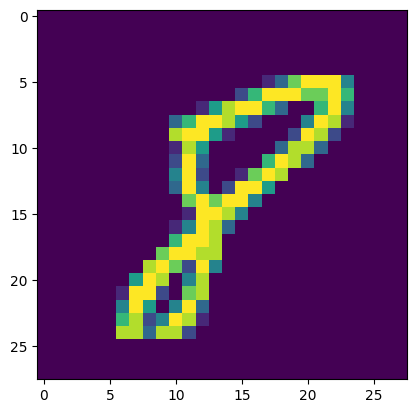

In [10]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import kagglehub # Import kagglehub to ensure the variable is available

# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
# Assuming login has already been performed successfully in a previous cell

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

digit_recognizer_path = kagglehub.competition_download('digit-recognizer')

print('Data source import complete.')
print(f'Data downloaded to: {digit_recognizer_path}') # Print the path to verify

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# Use the downloaded path for listing files
for dirname, _, filenames in os.walk(digit_recognizer_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Construct the full path to train.csv using the downloaded path
train_csv_path = os.path.join(digit_recognizer_path, 'train.csv')

# Read the csv using the correct path
df = pd.read_csv(train_csv_path)

df.shape
df.head()
df.sample()

import matplotlib.pyplot as plt
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

x=df.iloc[:,1:]
u=df.iloc[:,0]

In [11]:
df.shape

(42000, 785)

In [12]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2636,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
import matplotlib.pyplot as plt

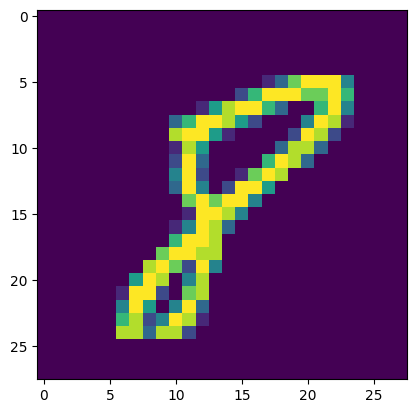

In [15]:
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

In [17]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_train.shape

(33600, 784)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
import time
start=time.time()

y_pred=knn.predict(x_test)
print(time.time()-start)

19.873610258102417


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [30]:
from pickle import NONE
from sklearn.decomposition import PCA
pca=PCA(n_components=100)

In [34]:
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

In [37]:
x_train_trf.shape

(33600, 100)

In [39]:
knn=KNeighborsClassifier()
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [40]:
y_pred=knn.predict(x_test_trf)

In [41]:
accuracy_score(y_test,y_pred)

0.9544047619047619

In [43]:
for i in range(1, 785):
    pca = PCA(n_components=i)
    x_train_trf = pca.fit_transform(x_train)
    x_test_trf = pca.transform(x_test)

    knn=KNeighborsClassifier()
    knn.fit(x_train_trf,y_train)
    y_pred=knn.predict(x_test_trf)
    print(f"PCA with {i} components: {accuracy_score(y_test,y_pred)}")

PCA with 1 components: 0.2580952380952381
PCA with 2 components: 0.3236904761904762
PCA with 3 components: 0.5104761904761905
PCA with 4 components: 0.6663095238095238
PCA with 5 components: 0.7378571428571429
PCA with 6 components: 0.8227380952380953
PCA with 7 components: 0.8436904761904762
PCA with 8 components: 0.8721428571428571
PCA with 9 components: 0.886547619047619
PCA with 10 components: 0.9055952380952381
PCA with 11 components: 0.9116666666666666
PCA with 12 components: 0.9184523809523809
PCA with 13 components: 0.9276190476190476
PCA with 14 components: 0.9351190476190476
PCA with 15 components: 0.9384523809523809
PCA with 16 components: 0.9379761904761905
PCA with 17 components: 0.9407142857142857
PCA with 18 components: 0.94
PCA with 19 components: 0.9425
PCA with 20 components: 0.9442857142857143
PCA with 21 components: 0.9438095238095238
PCA with 22 components: 0.9441666666666667
PCA with 23 components: 0.9442857142857143
PCA with 24 components: 0.9457142857142857
PCA 

KeyboardInterrupt: 

In [44]:
pca=PCA(n_components=100)
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)


In [45]:
x_train_trf

array([[-2.71863253, -0.48982409,  1.1354966 , ..., -1.00830808,
         1.23392591, -0.444621  ],
       [-0.67698015, -6.75362491, -2.33590139, ...,  0.15324231,
         0.75765667, -0.94551217],
       [-3.03323281,  6.50981624,  7.49182983, ..., -0.08278056,
         0.64321956, -1.81515192],
       ...,
       [ 2.14883643,  0.78079444, -0.74738774, ...,  0.19386694,
        -0.78390329, -1.63218386],
       [ 1.05957006,  0.94767312,  3.94973114, ..., -0.67082974,
        -0.63103382, -0.83317559],
       [17.70258446,  1.96188185, -4.94352837, ...,  2.22131615,
        -1.51784792,  0.02360604]])

In [48]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter(x=x_train_trf[:,0],y=x_train_trf[:,1],color=y_train_trf, color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

In [49]:
pca=PCA(n_components=3)
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

In [50]:
x_train_trf

array([[-2.71863253, -0.48982409,  1.1354966 ],
       [-0.67698015, -6.75362491, -2.33590139],
       [-3.03323281,  6.50981624,  7.49182983],
       ...,
       [ 2.14883643,  0.78079444, -0.74738774],
       [ 1.05957006,  0.94767312,  3.94973114],
       [17.70258446,  1.96188185, -4.94352837]])

In [51]:
y_train_trf=y_train.astype(str)
fig=px.scatter_3d(x=x_train_trf[:,0],y=x_train_trf[:,1],z=x_train_trf[:,2],color=y_train_trf, color_discrete_sequence = px.colors.qualitative.G10)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [52]:
pca.explained_variance_


array([40.67111198, 29.17023401, 26.74459621])

In [53]:
pca.components_.shape

(3, 100)

In [54]:
pca.explained_variance_ratio_

array([0.08024204, 0.05755139, 0.05276573])

In [55]:
pca=PCA(n_components=None)
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

In [56]:
pca.explained_variance_.shape

(100,)

In [57]:
pca.components_.shape

(100, 100)

In [58]:
pca.explained_variance_ratio_

array([0.08024204, 0.05755139, 0.05276573, 0.04114279, 0.03580689,
       0.03127713, 0.02736694, 0.02462357, 0.02175757, 0.01991855,
       0.01900577, 0.01702233, 0.01590795, 0.01557667, 0.01468206,
       0.01414669, 0.0132832 , 0.0130756 , 0.01265645, 0.01234688,
       0.01165018, 0.01137448, 0.01089235, 0.01049617, 0.01022599,
       0.00973531, 0.00968032, 0.00930838, 0.00887481, 0.00874293,
       0.00853507, 0.00835528, 0.0080957 , 0.0080246 , 0.0079384 ,
       0.0075787 , 0.00753442, 0.00732589, 0.00712073, 0.00685212,
       0.00676412, 0.00668516, 0.00649411, 0.00637119, 0.00634787,
       0.00623078, 0.00616785, 0.00612428, 0.00603511, 0.0059924 ,
       0.00585059, 0.00580113, 0.00565898, 0.00557591, 0.00552502,
       0.00547318, 0.005366  , 0.00531501, 0.00522288, 0.00519016,
       0.00506059, 0.00500442, 0.00490849, 0.00482603, 0.00477585,
       0.00468728, 0.0046464 , 0.00460504, 0.00453392, 0.00444552,
       0.00442151, 0.00431904, 0.00429469, 0.00424195, 0.00421

In [59]:
np.cumsum(pca.explained_variance_ratio_)

array([0.08024204, 0.13779343, 0.19055916, 0.23170195, 0.26750884,
       0.29878597, 0.32615291, 0.35077648, 0.37253405, 0.3924526 ,
       0.41145837, 0.4284807 , 0.44438865, 0.45996531, 0.47464737,
       0.48879406, 0.50207727, 0.51515287, 0.52780932, 0.5401562 ,
       0.55180638, 0.56318086, 0.57407321, 0.58456937, 0.59479537,
       0.60453068, 0.614211  , 0.62351938, 0.63239419, 0.64113712,
       0.64967219, 0.65802747, 0.66612317, 0.67414777, 0.68208617,
       0.68966487, 0.69719929, 0.70452517, 0.7116459 , 0.71849802,
       0.72526214, 0.7319473 , 0.73844141, 0.7448126 , 0.75116047,
       0.75739125, 0.7635591 , 0.76968338, 0.77571849, 0.78171089,
       0.78756149, 0.79336262, 0.7990216 , 0.80459751, 0.81012253,
       0.81559571, 0.82096171, 0.82627672, 0.8314996 , 0.83668976,
       0.84175035, 0.84675476, 0.85166326, 0.85648929, 0.86126514,
       0.86595242, 0.87059881, 0.87520385, 0.87973776, 0.88418329,
       0.8886048 , 0.89292384, 0.89721853, 0.90146048, 0.90567

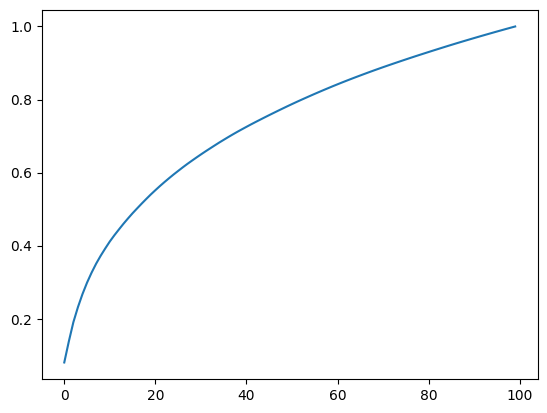

In [61]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))